In [1]:
from __future__ import print_function, division
from builtins import range

import numpy as np
import matplotlib.pyplot as plt

from comparing_epsilons import run_experiment as run_experiment_eps

In [5]:
class Bandit:
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + 1.0/self.N*x        

In [6]:
def run_experiment_oiv(means, N, upper_limit=10):
    bandits = [Bandit(mean, upper_limit) for mean in means]
    # 'data' for plotting
    data = np.empty(N)
    for i in range(N):
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)        
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N)+1)
    
    plt.plot(cumulative_average)
    for mean in means:
        plt.plot(np.ones(N)*mean)
    plt.xscale('log')
    plt.show()
    
    return cumulative_average

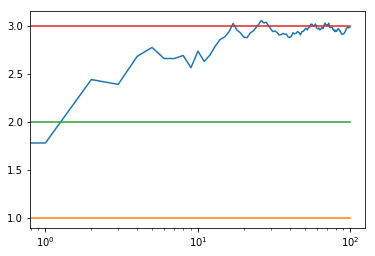

1.2731647661489764
2.7870071767176148
3.108288228367117


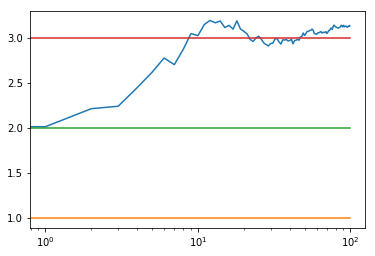

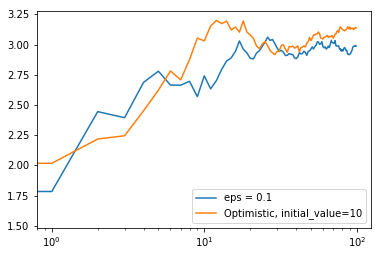

In [7]:
if __name__ == '__main__':
    c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100)
    oiv = run_experiment_oiv([1.0, 2.0, 3.0], 100)    
    
    #log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='Optimistic, initial_value=10')    
    plt.legend()
    plt.xscale('log')
    plt.show()        